# Análise de Previsão

O objetivo desse estudo de caso é prever se o cliente irá realizar o depósito a prazo (sim ou não).

Link do dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

## Carregando Pacotes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importando dataset.

In [2]:
df = pd.read_csv('dados/bank.csv', sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data Wrangling

Agora iremos analizar e entender melhor os dados, para posteriormente fazer algumas manipulações e a engenharia de atributos.

In [3]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Sem dados faltantes.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


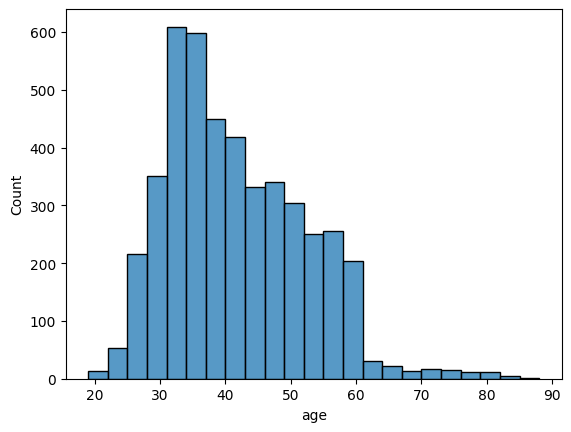

In [5]:
sns.histplot(data= df, x= 'age', binwidth= 3)
plt.show()

Observamos uma grande quantidade de clientes entre 30 e 40 anos.

Observações: 

* Será necessário aplicar **One Hot Encodin** nas seguintes colunas: marital, education, contact, 
* Será necessário aplicar **Label Enconder** nas seguintes colunas: default, housing, loan, 
* Precisaremos analisar a correlação das colunas campaign, pdays e previous com a variável target.

## Feature Engineering

In [6]:
df_copy = df.copy()

Primeiro vamos aplicar a **One Hot Encoding**.

In [7]:
df_copy = pd.get_dummies(df_copy, columns = ['marital', 'education', 'contact'], dtype= 'int')

Agora a **Label Enconder**.

In [8]:
label = ['default', 'housing', 'loan']
df_copy[label] = np.where(df_copy[label] == 'yes', 1, 0)